In [2]:
#import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection

from IPython import display


plt.rcParams['figure.figsize'] = 12, 9

# Plan de Classification
[x] Intro Classification

[x] Perceptron

[x] Multilayer

[x] Other models (SVM, Bayesian...)


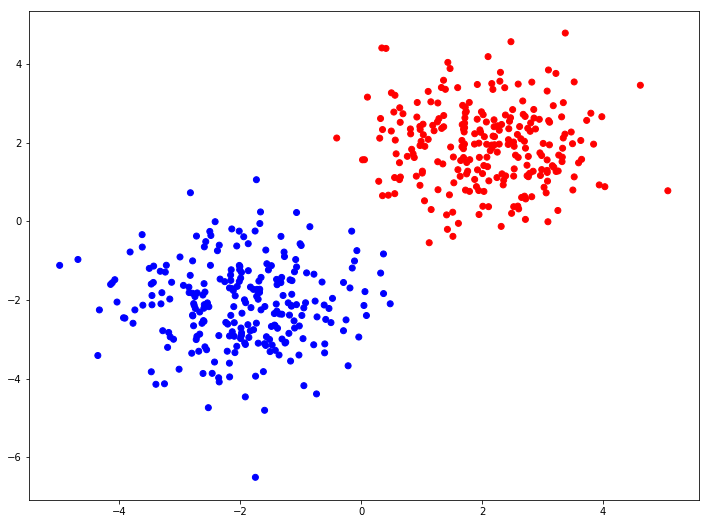

In [4]:
# Creating some toy data

centroids = np.array([[-2, -2], [2, 2]])
labels = np.array([0, 1])

x = []  # Features
y = []  # Labels

n = 500

for p, l in zip(centroids, labels):
    x.extend( np.concatenate((np.random.normal(p[0], 1, n//2), 
                              np.random.normal(p[1], 1, n//2))).reshape(2, n//2).T)
    y.extend([l] * (n//2))
    
x = np.array(x)
y = np.array(y)
colours = ['b' if l==0 else 'r' for l in y]
plt.scatter(x[..., 0], x[..., 1], c=colours)
plt.show()

## Perceptron

Modèle très simple en 2 dimensions :
![Perceptron](img/perceptron.png)

* $x_1$ et $x_2$ les coordonnées d'un point
* $w_1$, $w_2$ et $b$ les paramètres du modèle
* $f$ est la fonction heaviside ($0$ si $x < 0$, $1$ sinon)
* $y$ est la sortie du modèle pour l'entrée $\textbf{x}$

Une prédiction est donnée par l'équatioin suivante:
$$
y = f(\sum_i w_i \cdot x_i + b)
$$

On utilise l'équation d'apprentissage suivante :
$$
\theta^{n+1} = \theta^n - \eta\nabla_\theta E(y, t)
$$

Où $E$ désigne l'erreur commise par le modèle :
$$
E(y, t) = \frac{1}{2}(y - t)^2
$$

L'équation d'apprentissage provient de la descente de gradient : pour minimiser l'erreur on suit l'opposé de la «direction» donnée par le gradient de l'erreur par rapport aux paramètres du modèle.
Exemple : 
$$
\frac{\partial E}{\partial w_1} = \frac{\partial E}{\partial y} \frac{\partial y}{\partial w_1}
$$
$$
\frac{\partial E}{\partial w_1} = (y-t) \times x_1
$$


In [5]:
def plot_discriminator(predict_f, x, y):
    """ 
    Plot a weight vector w = [w_0,w_1,w_2] as a colour map
    """
    
    xx,yy = np.mgrid[-5:5:.1,-5:5:0.1]

    p = np.zeros(xx.shape)
    for i in range(xx.shape[0]):
        for j in range(xx.shape[1]):
            p[i,j] = predict_f([xx[i,j], yy[i,j]])
    plt.pcolor(xx,yy,p,cmap='seismic')
    plt.xlim([-5, 5])
    plt.ylim([-5, 5])    
    plt.scatter(x[..., 0], x[..., 1], 20, colours)
    plt.show()
    

In [7]:
# Perceptron
"""
Ici on va tout coder de bout en bout pour un modèle simple.
"""
W = np.random.normal(0, 1, (2,))
b = np.zeros(1)

def reset_weights():
    W = np.random.normal(0, 1, (2,))
    b = np.zeros(1)

def haversine(z):
    return np.where(z >= 0, 1, 0)

def predict_class_perceptron(X):
    return haversine(W.dot(X) + b)

def gradient(X, t):
    """
    Doit calculer le gradient de E par rapport à W, puis le gradient de E par rapport à b et retourner les valeurs
    """
    y = predict_class_perceptron(X)
    
    return (y-t) * X, (y-t)



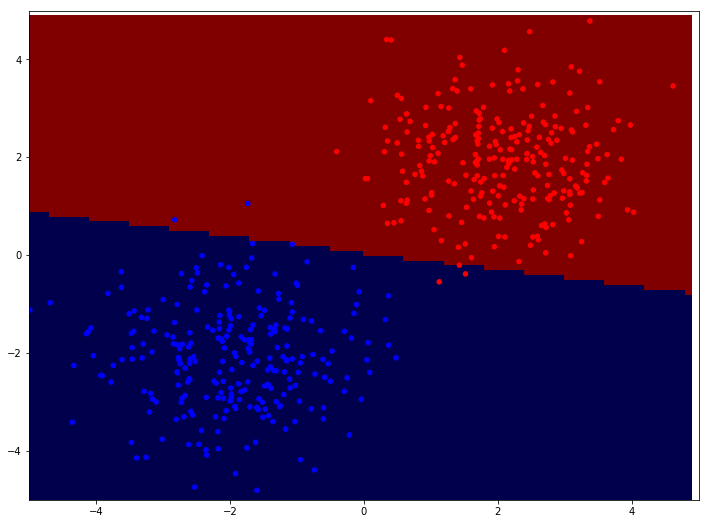

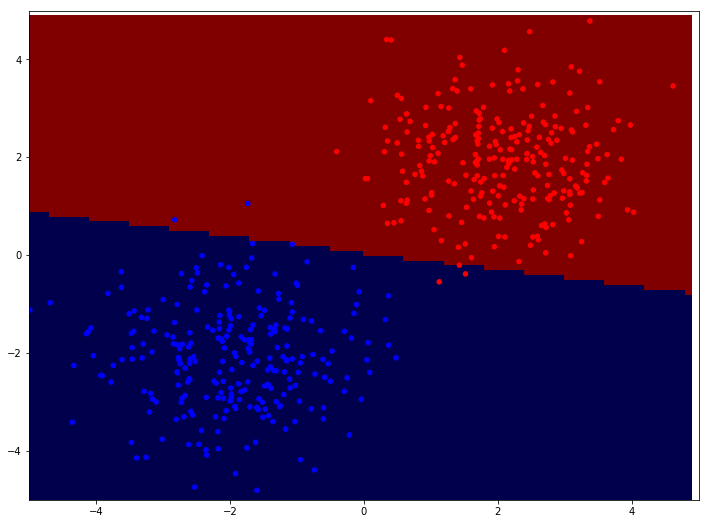

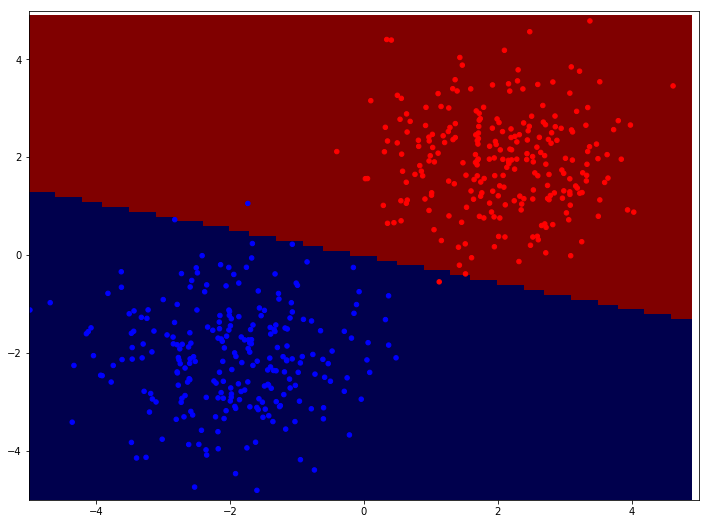

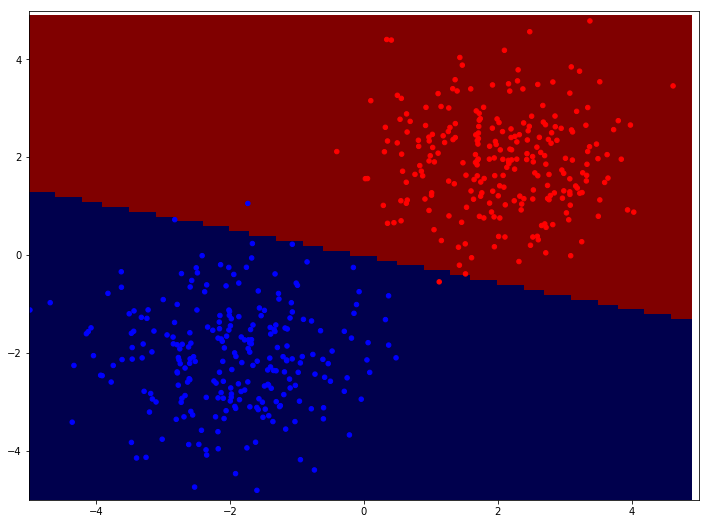

Epoch 0, accuracy=0.9925


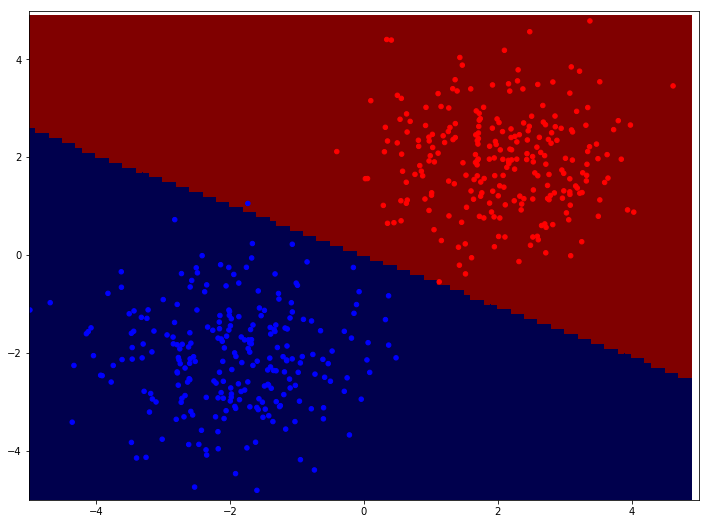

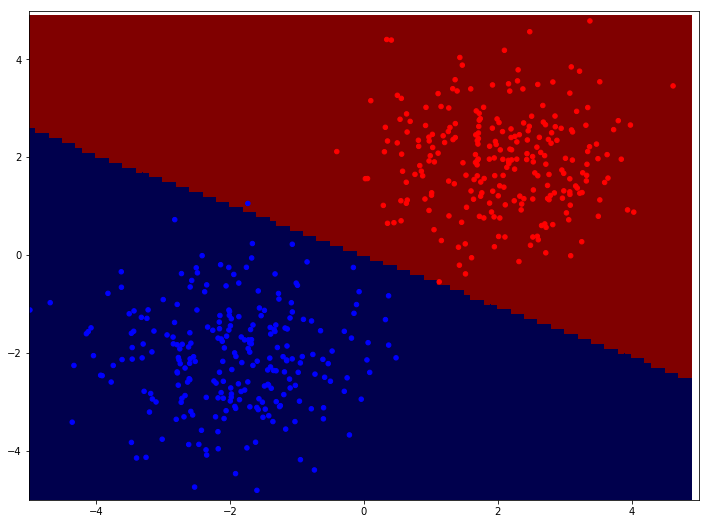

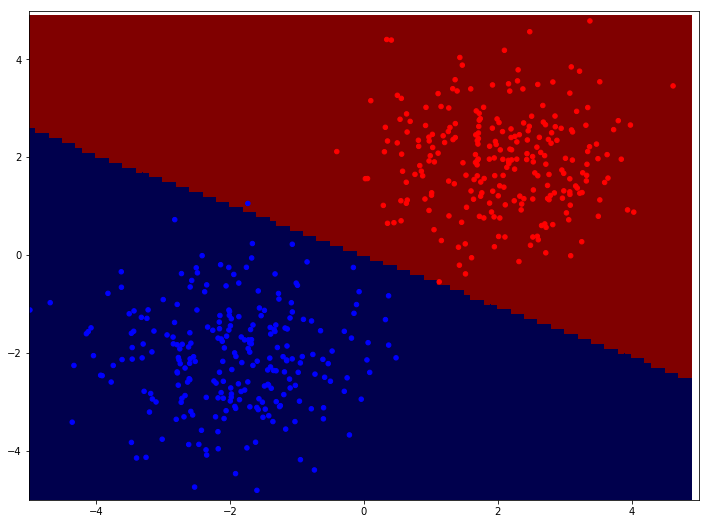

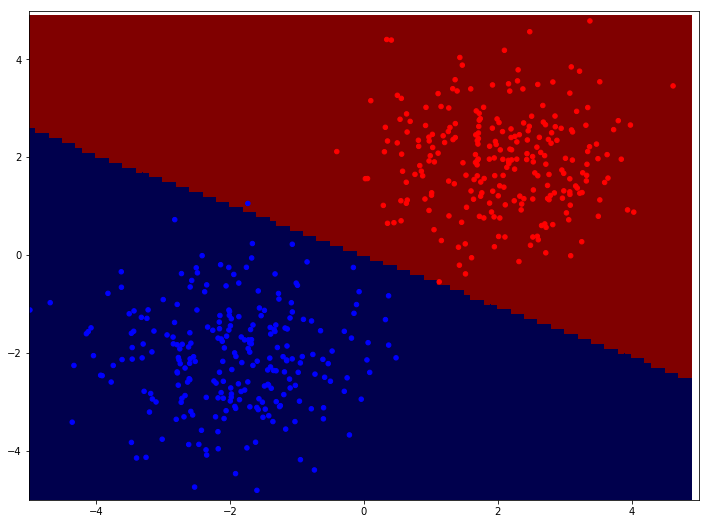

Epoch 1, accuracy=0.9975


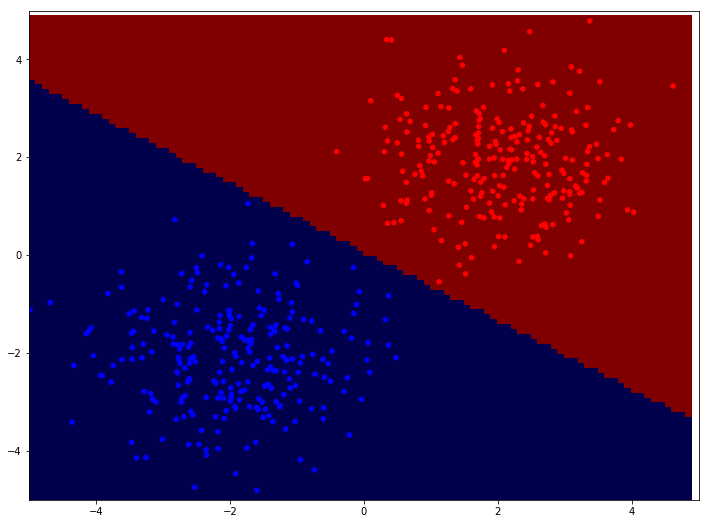

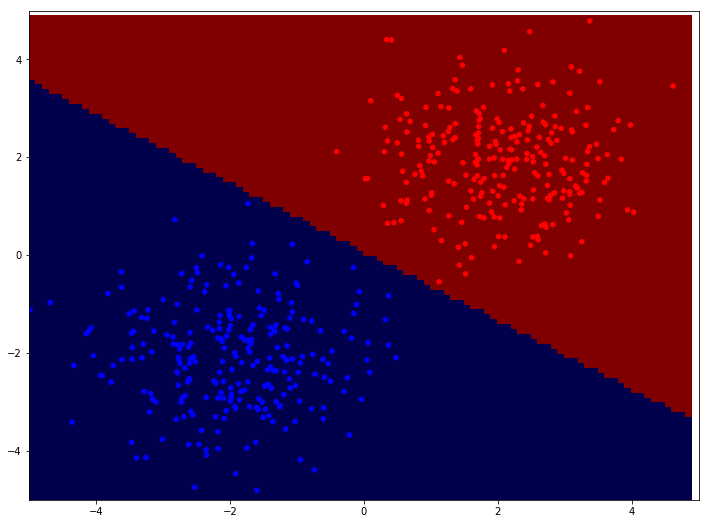

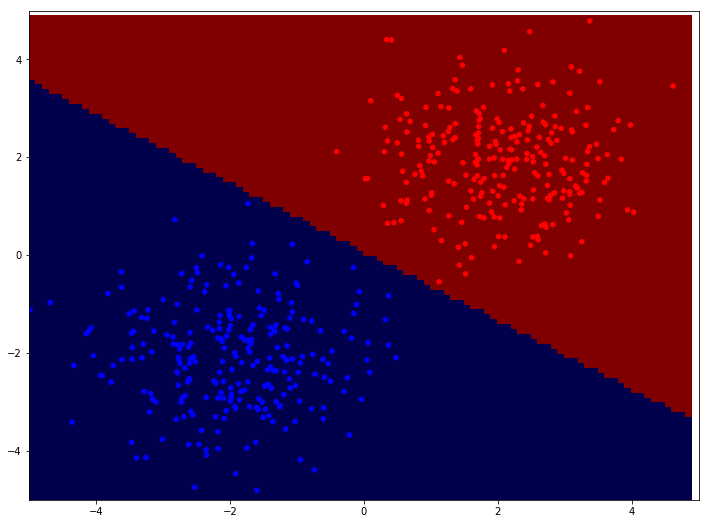

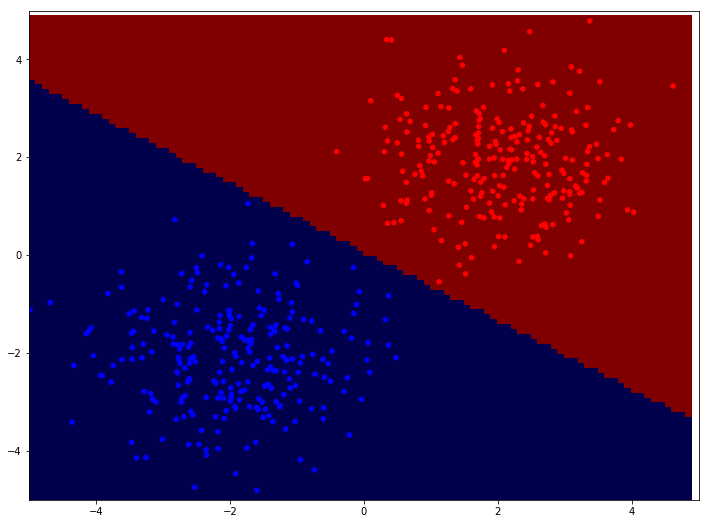

Epoch 2, accuracy=1.0


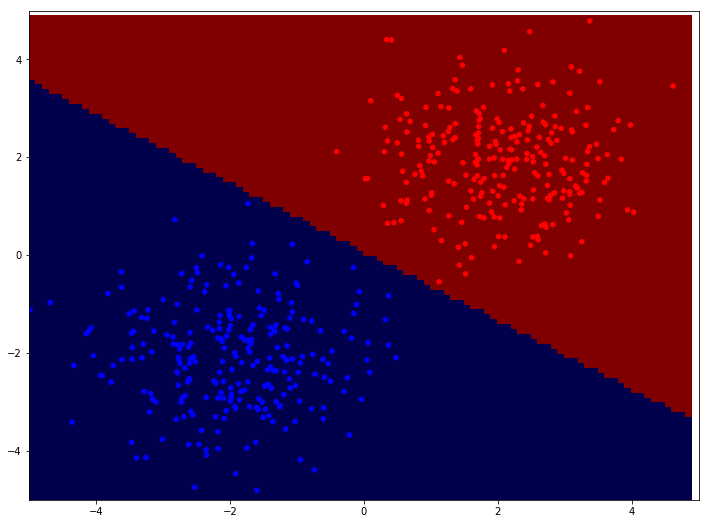

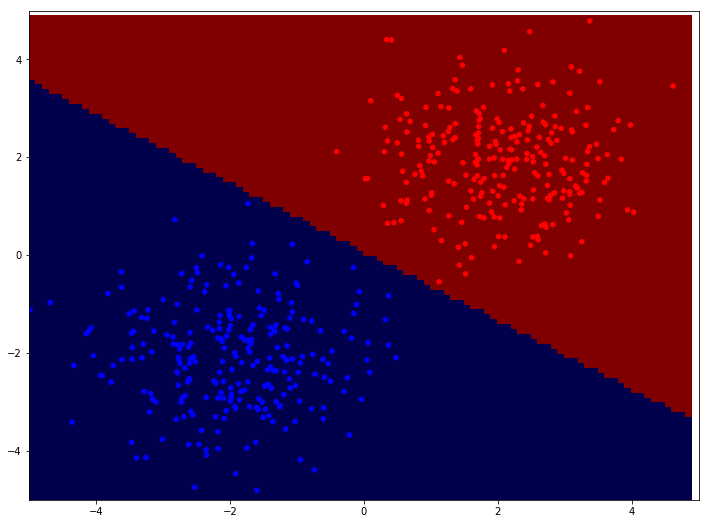

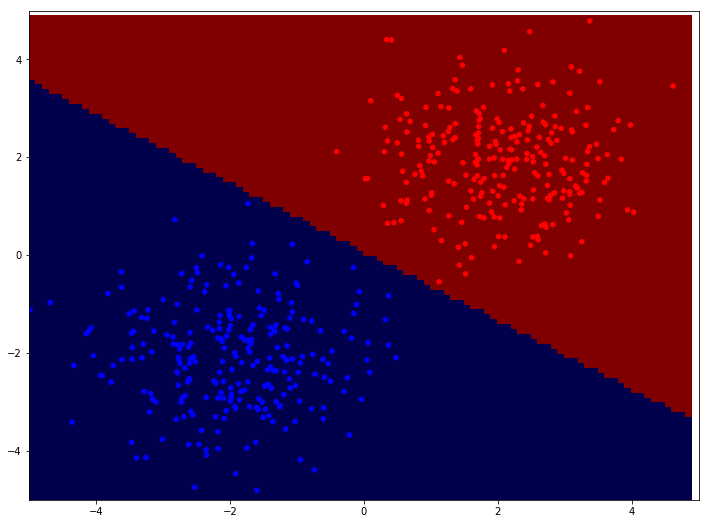

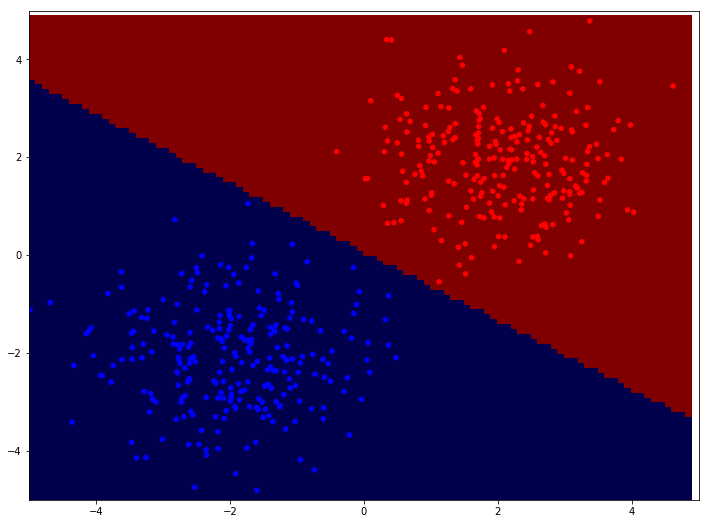

Epoch 3, accuracy=1.0


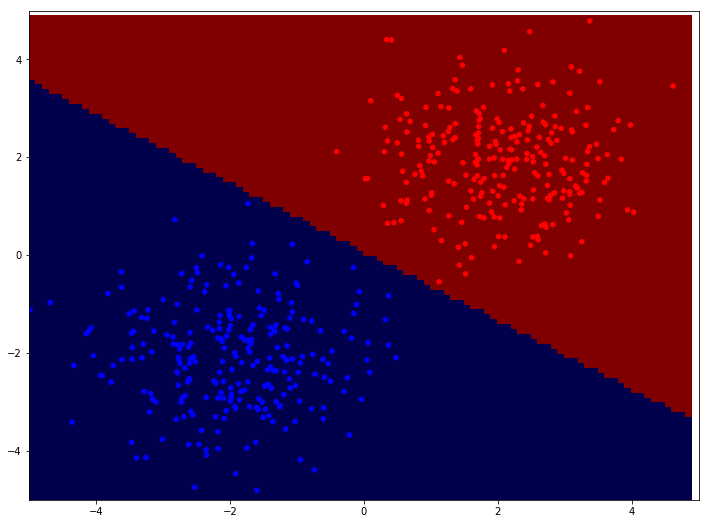

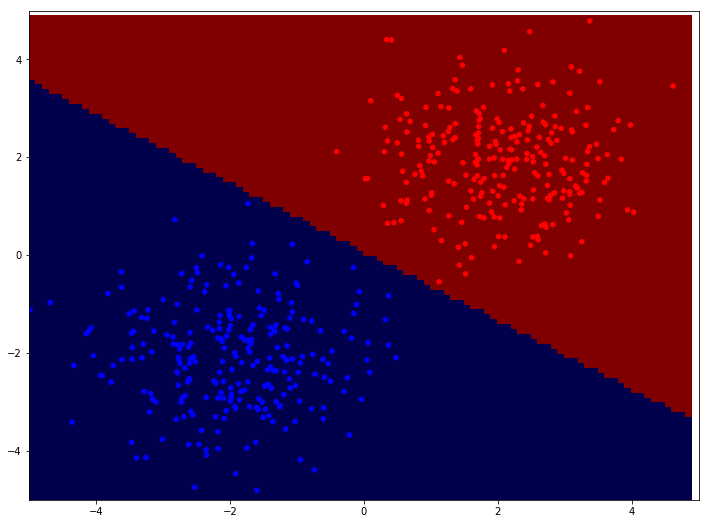

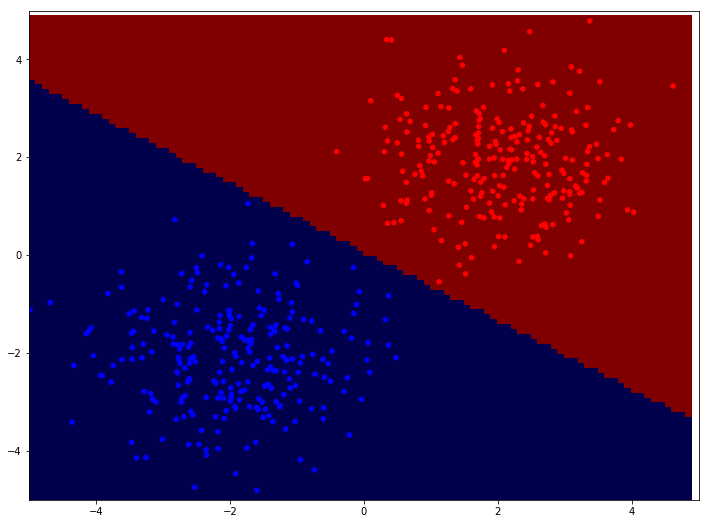

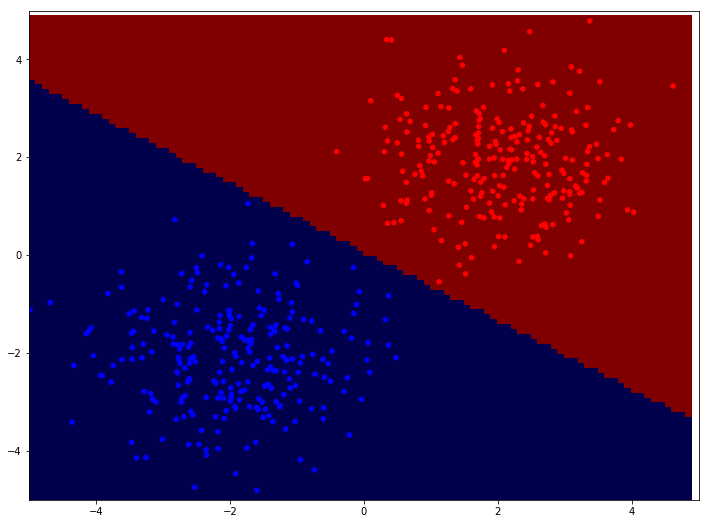

Epoch 4, accuracy=1.0


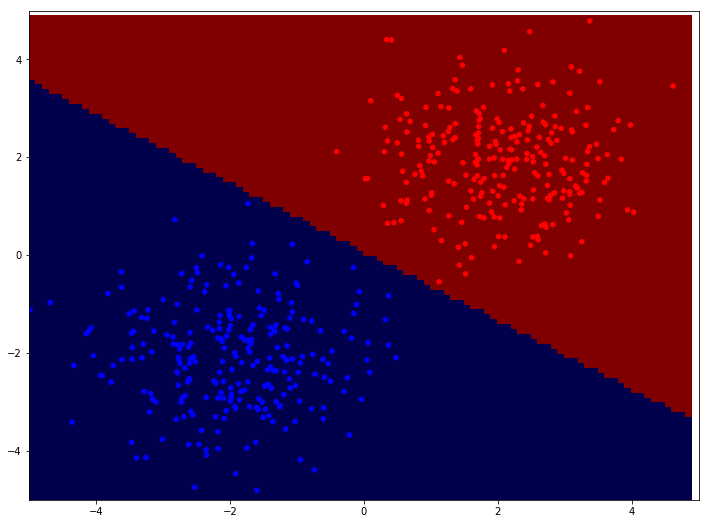

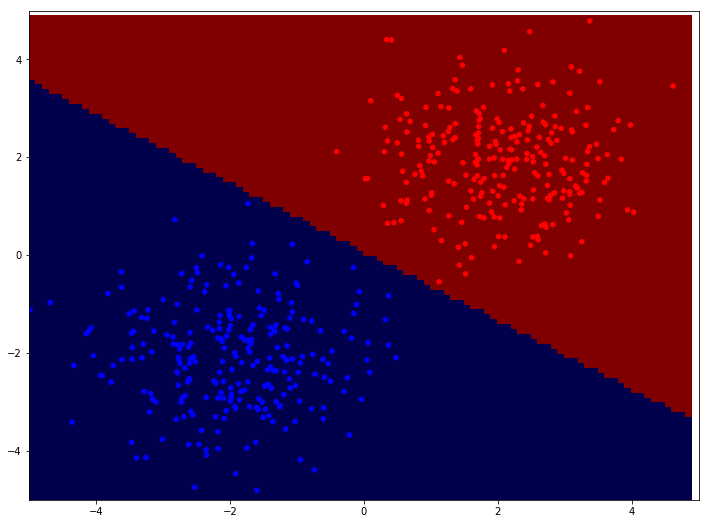

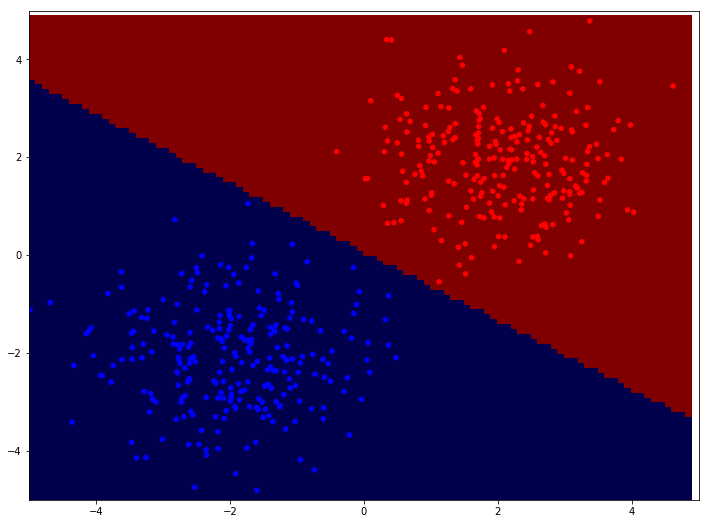

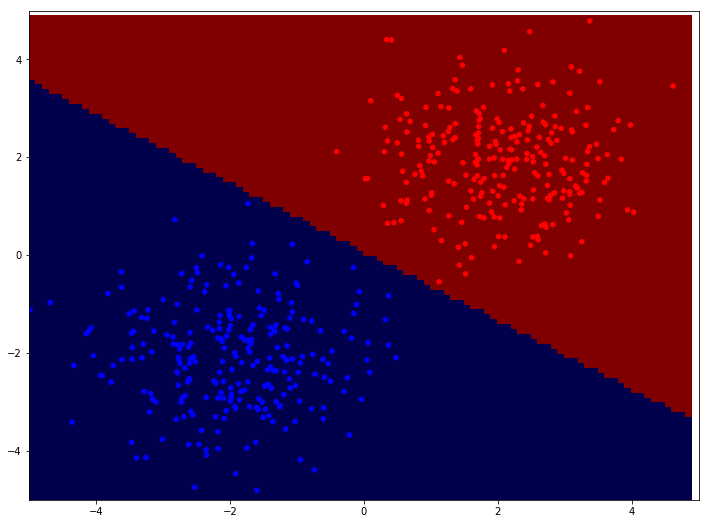

Epoch 5, accuracy=1.0


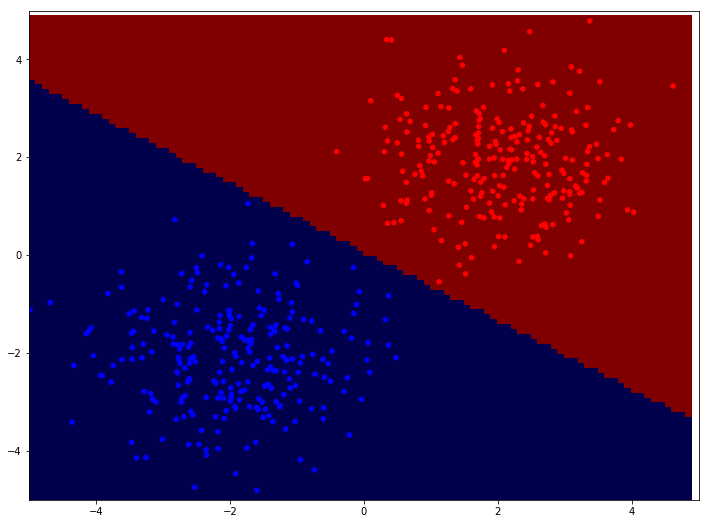

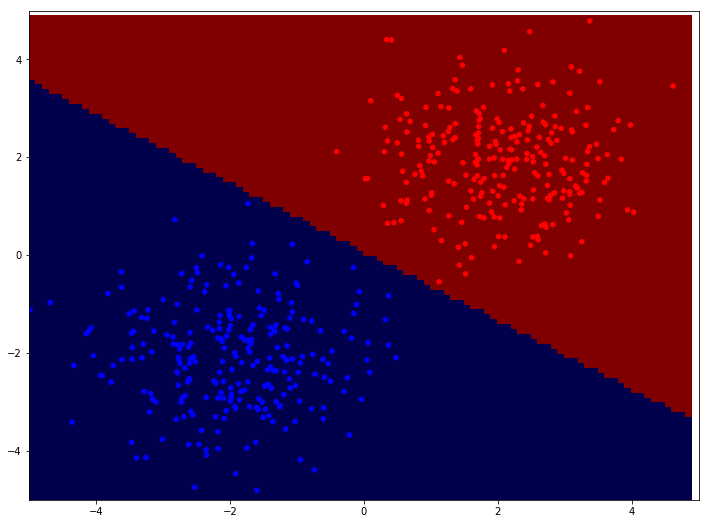

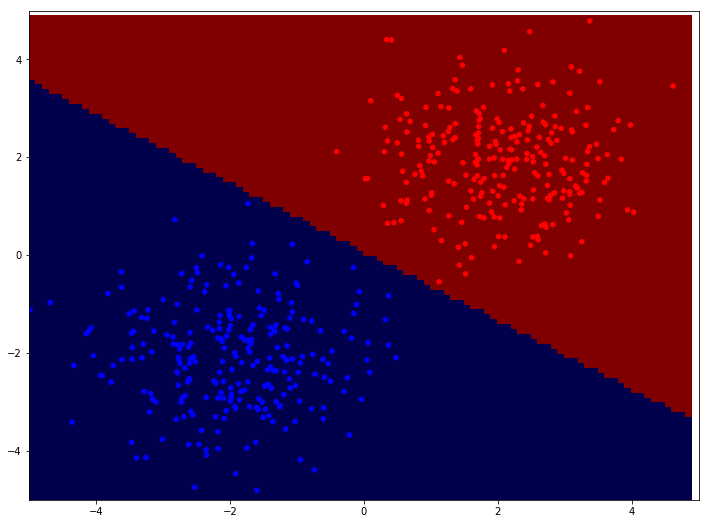

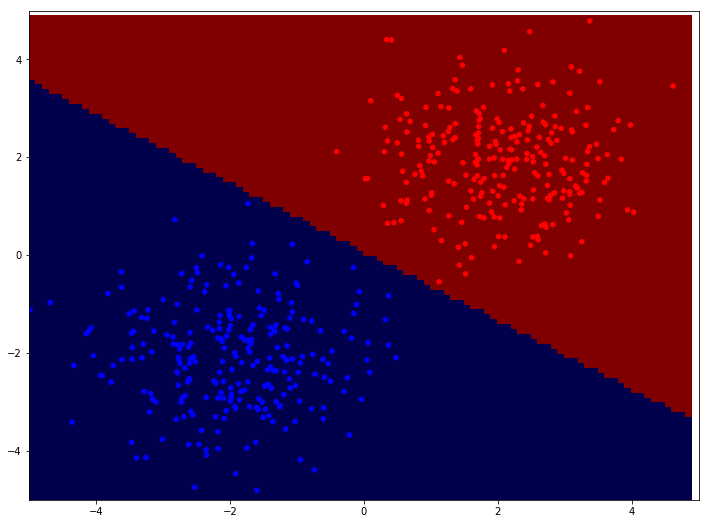

Epoch 6, accuracy=1.0


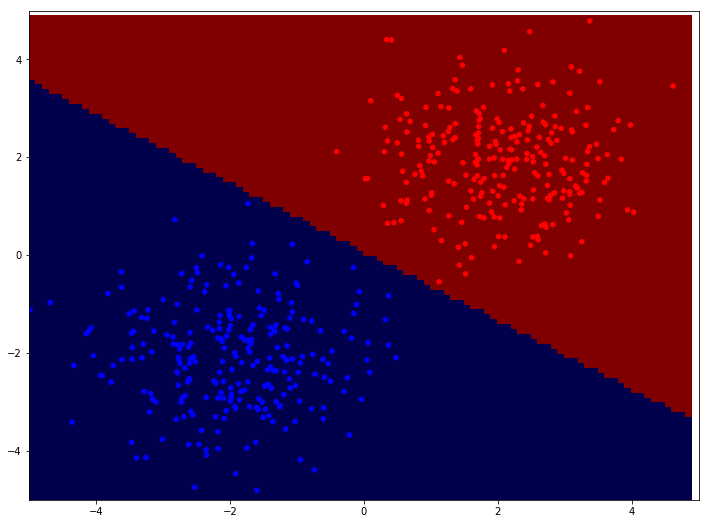

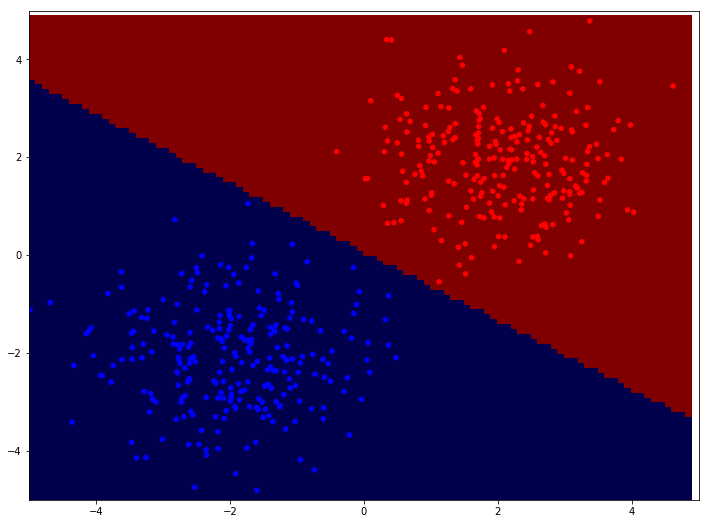

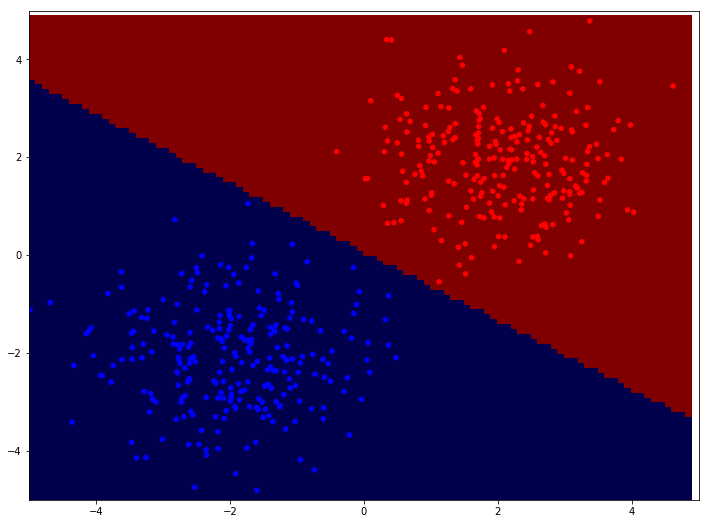

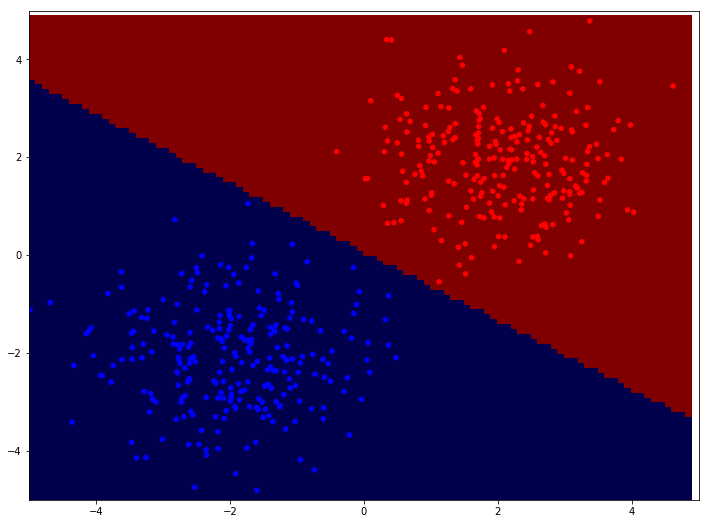

Epoch 7, accuracy=1.0


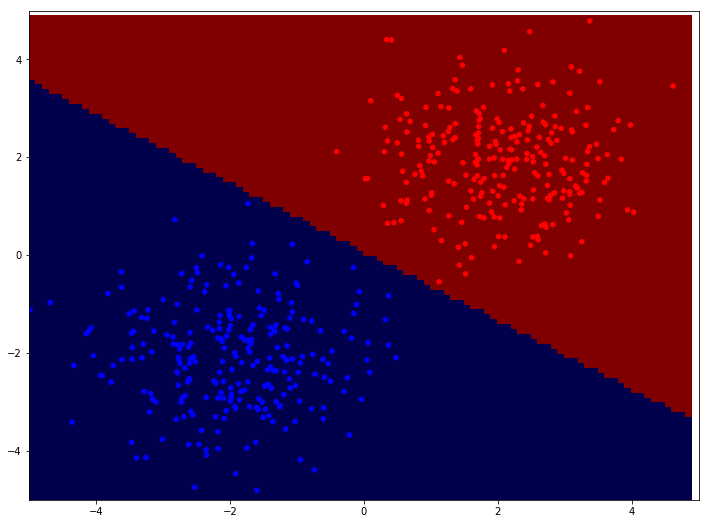

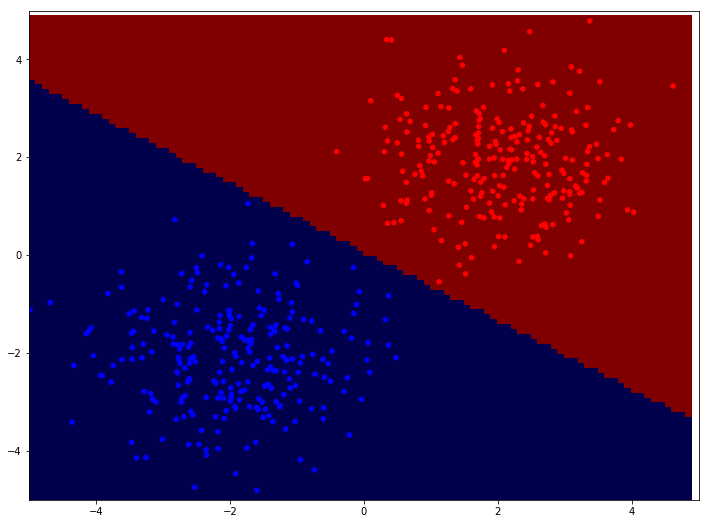

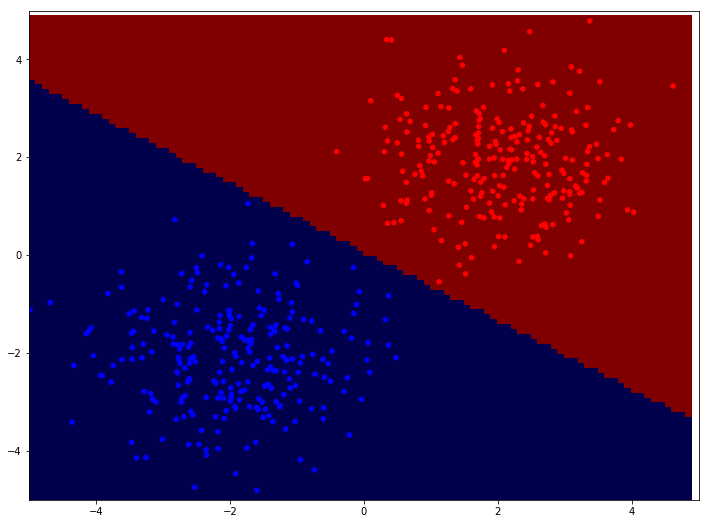

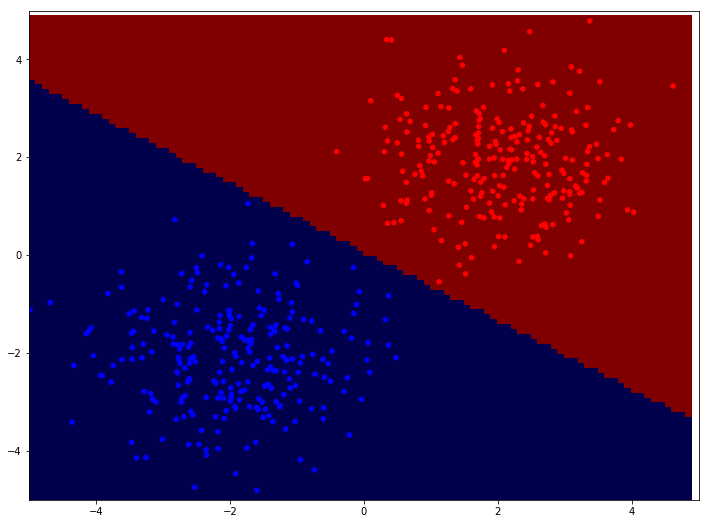

Epoch 8, accuracy=1.0


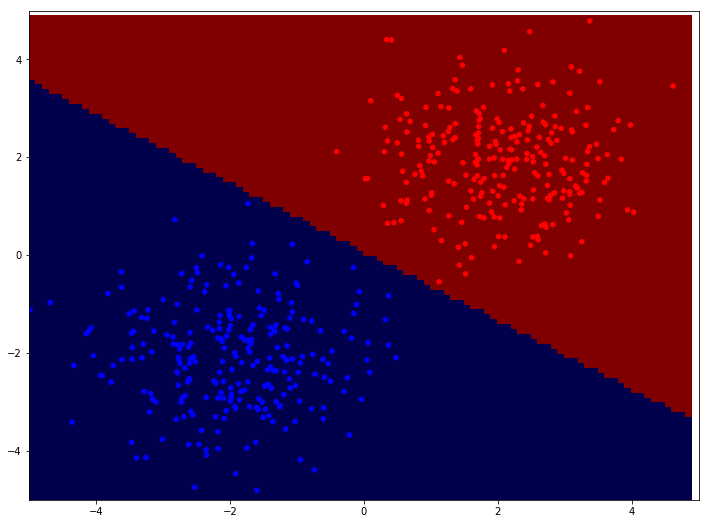

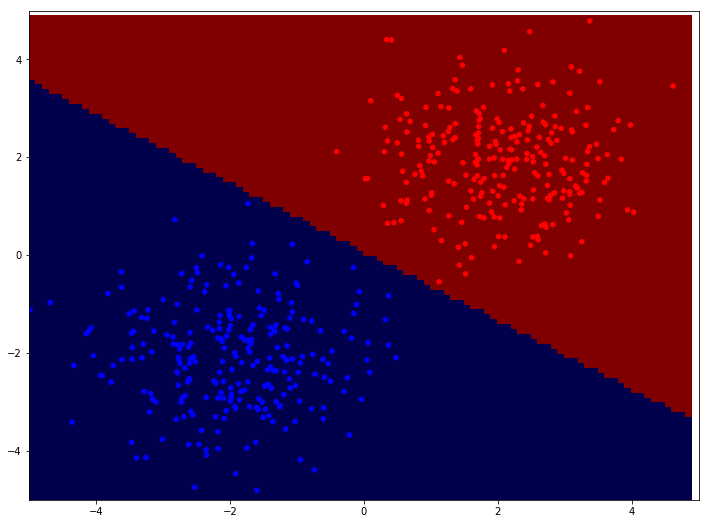

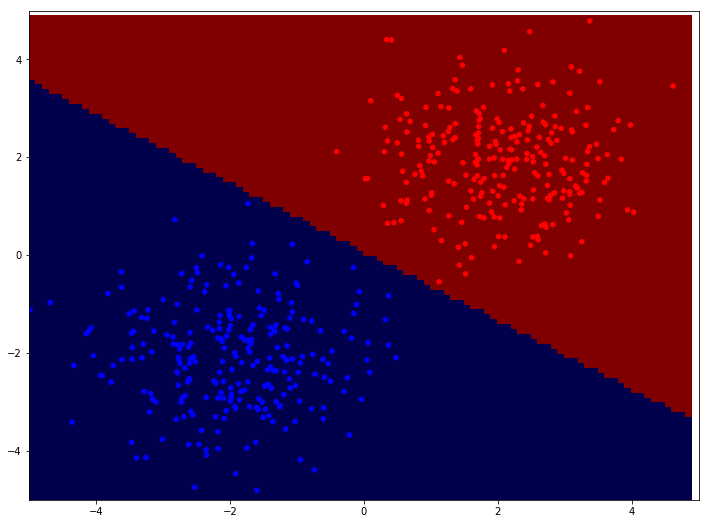

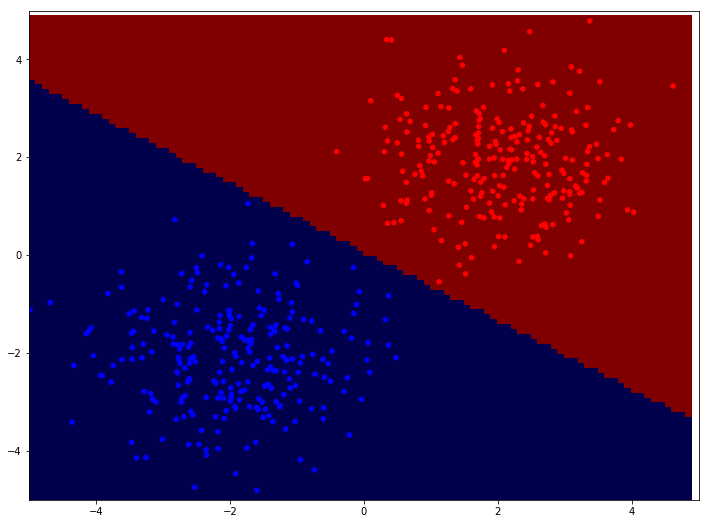

Epoch 9, accuracy=1.0


'\nEvaluez le modèle final sur les données de test\n'

In [9]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2, random_state=42)
learning_rate = 0.1
plotme = True

reset_weights()

for e in range(10):
    count = 0
    correct, tot = 0, 0
    for xt, yt in zip(x_train, y_train):
        
        if predict_class_perceptron(xt) != yt:
            dW, db = gradient(xt, yt)
            W = W - learning_rate * dW
            b = b - learning_rate * db
            """
            Il faut mettre à jour les paramètres du modèle ici (W et b) !
            """
        else:
            correct += 1
        tot += 1
        
        if plotme and count % 100==0:
            plot_discriminator(predict_class_perceptron, x, y)
        count += 1
    print(f"Epoch {e}, accuracy={correct/tot}")
    
"""
Evaluez le modèle final sur les données de test
"""


Changeons maintenant de données d'entrainement pour des données un petit peu plus complexes et difficiles à séparer

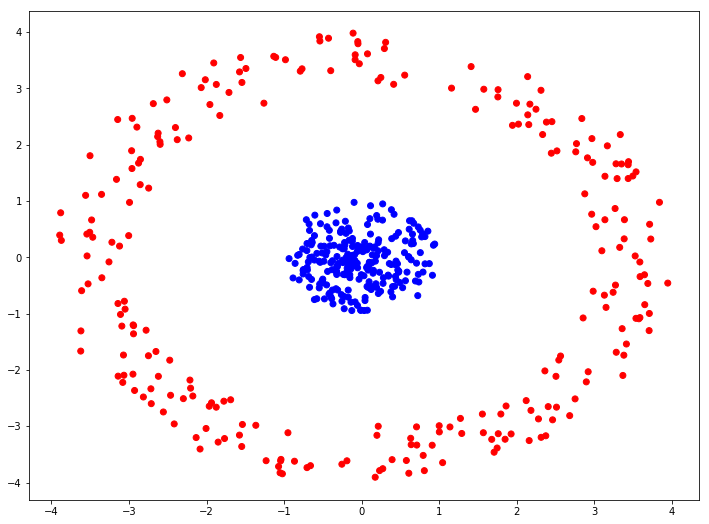

In [10]:
r = [[0.1, 1], [3, 4]]

x2 = []
y2 = []

for (r_min, r_max), l in zip(r, labels):
    rr = np.random.uniform(r_min, r_max, n//2)
    theta = np.random.uniform(0, 2*np.pi, n//2)
    x2.extend( np.concatenate((rr * np.cos(theta), 
                              rr * np.sin(theta))).reshape(2, n//2).T)
    y2.extend([l] * (n//2))
    
x2 = np.array(x2)
y2 = np.array(y2)

plt.scatter(x2[:,0], x2[:,1], c=colours)


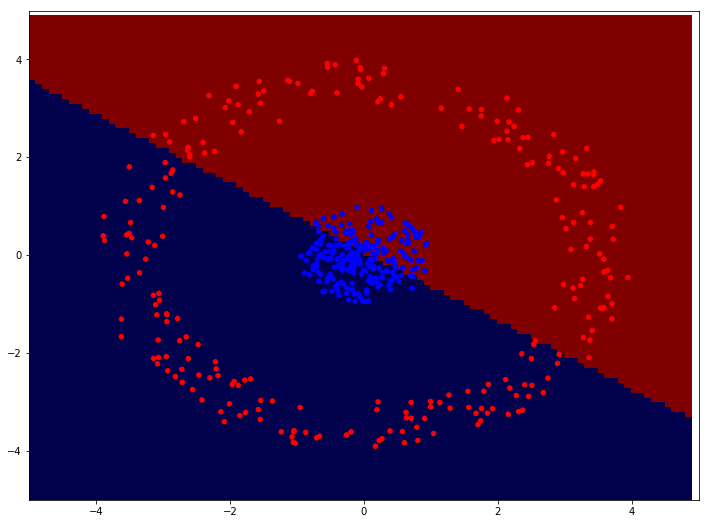

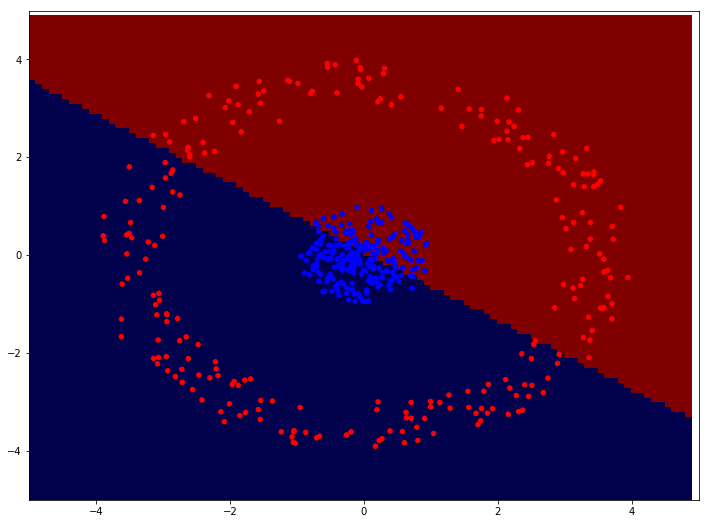

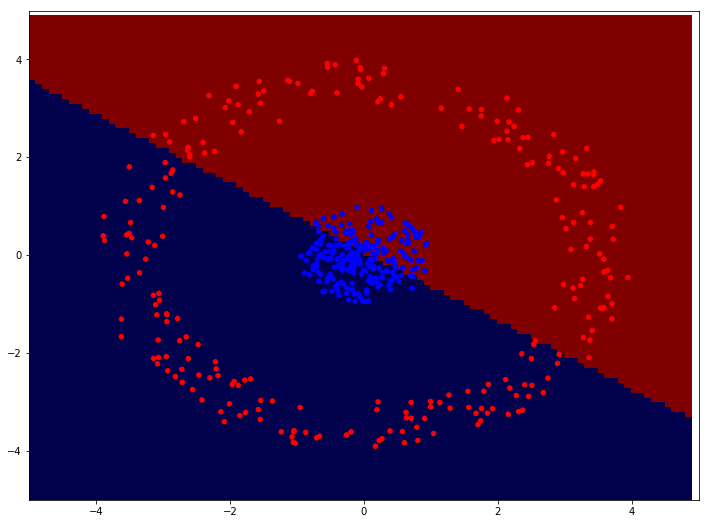

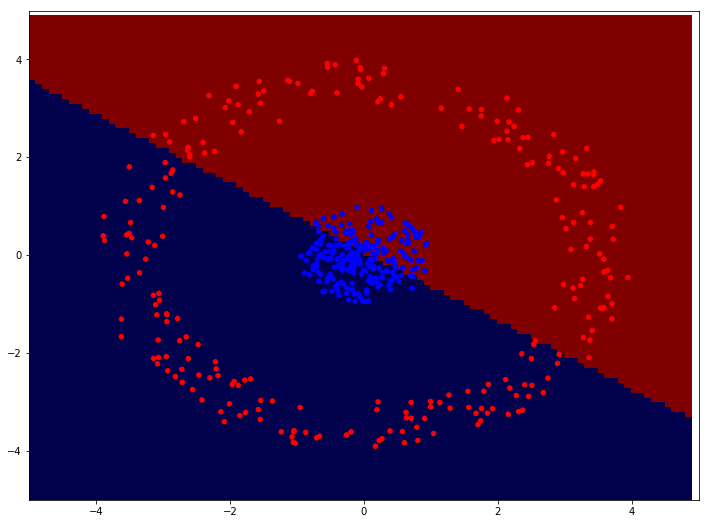

Epoch 0, accuracy=0.54


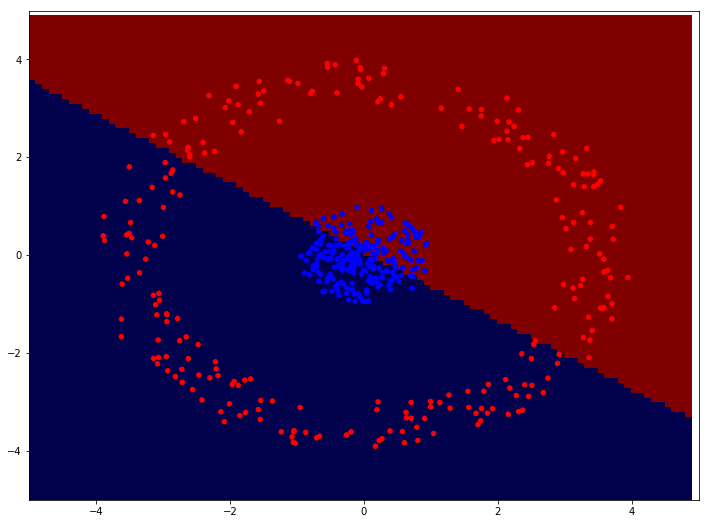

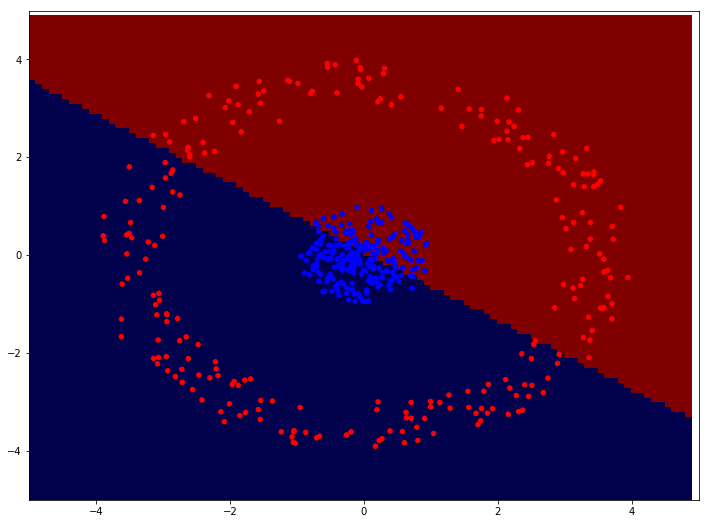

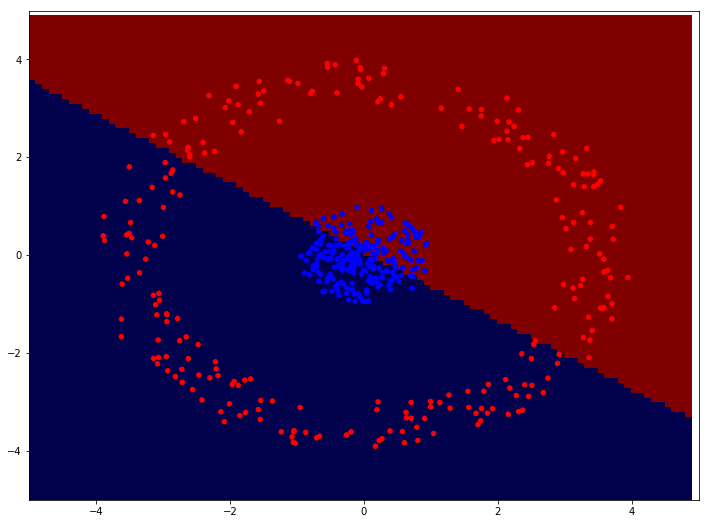

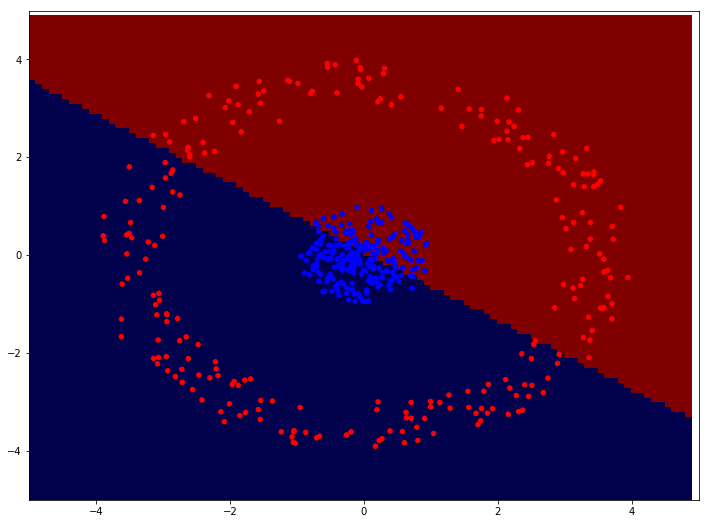

Epoch 1, accuracy=0.54


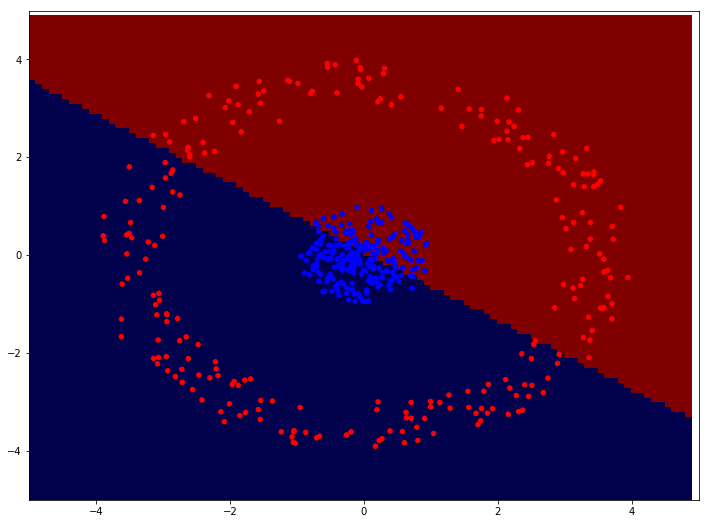

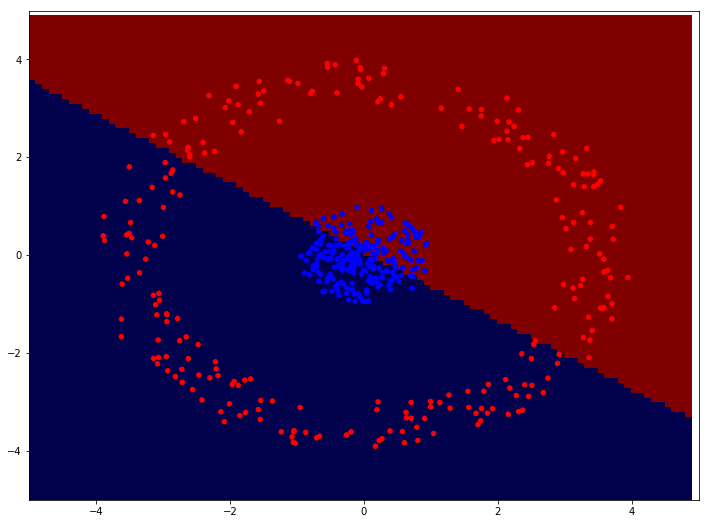

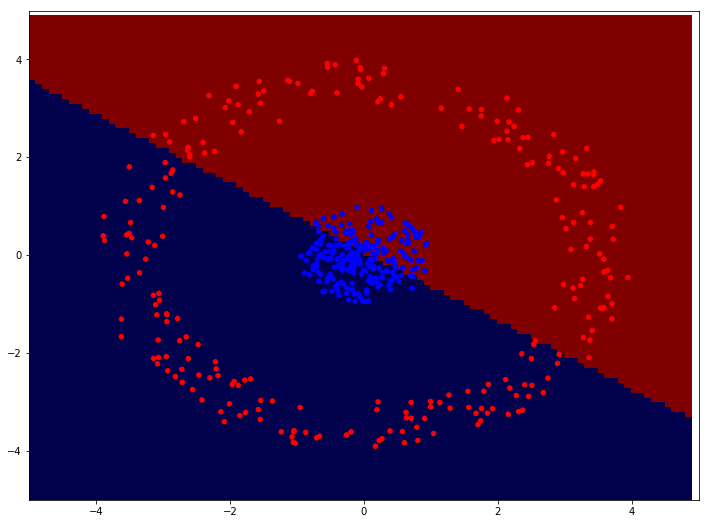

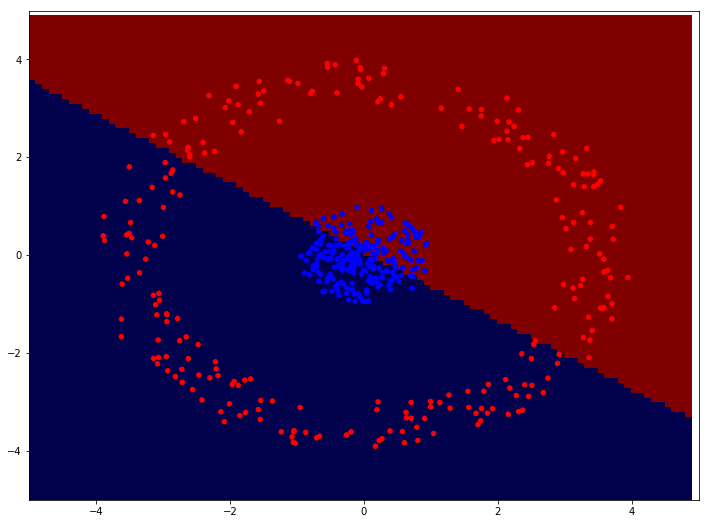

Epoch 2, accuracy=0.54


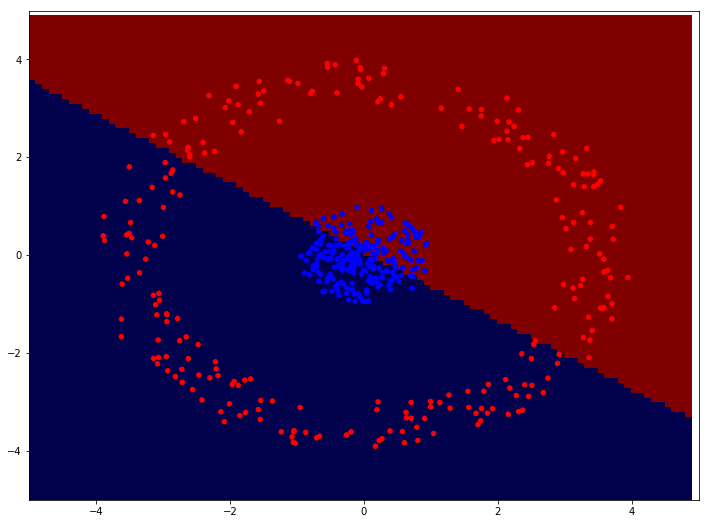

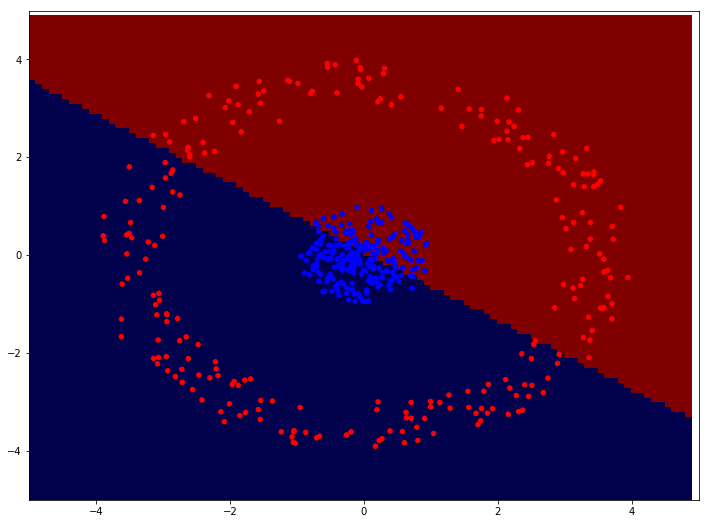

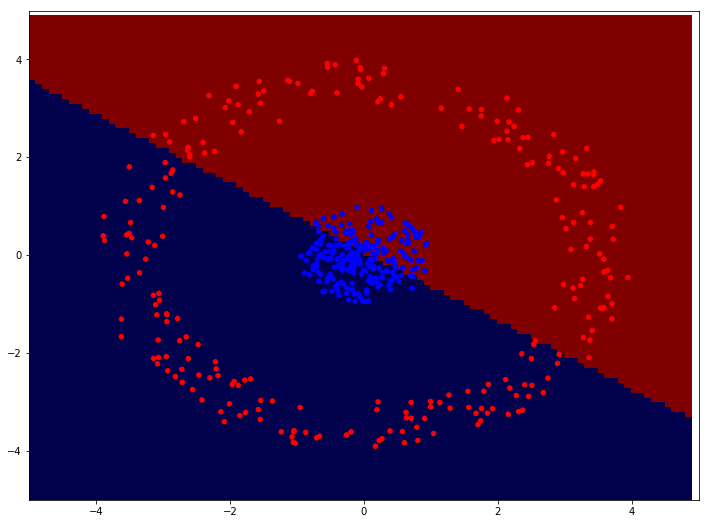

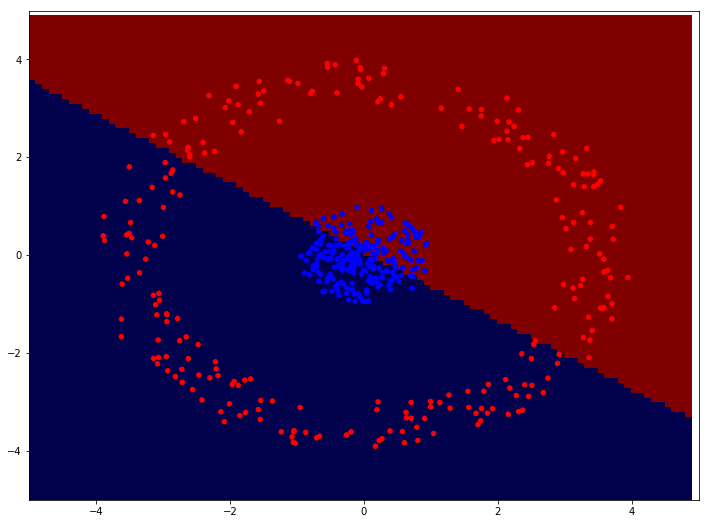

Epoch 3, accuracy=0.54


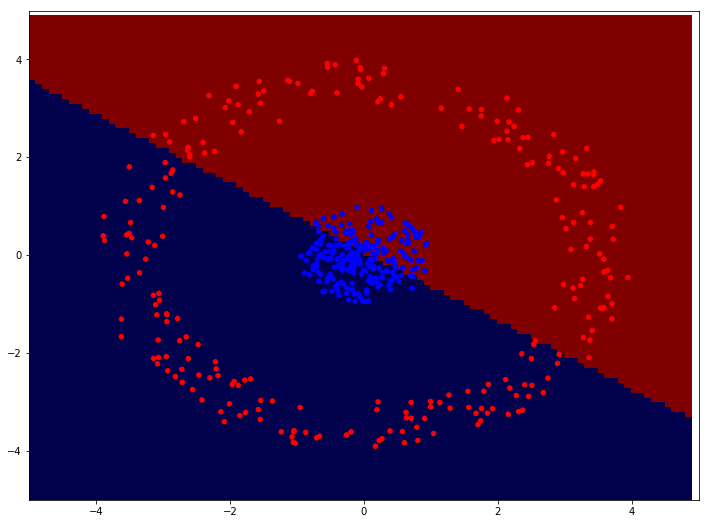

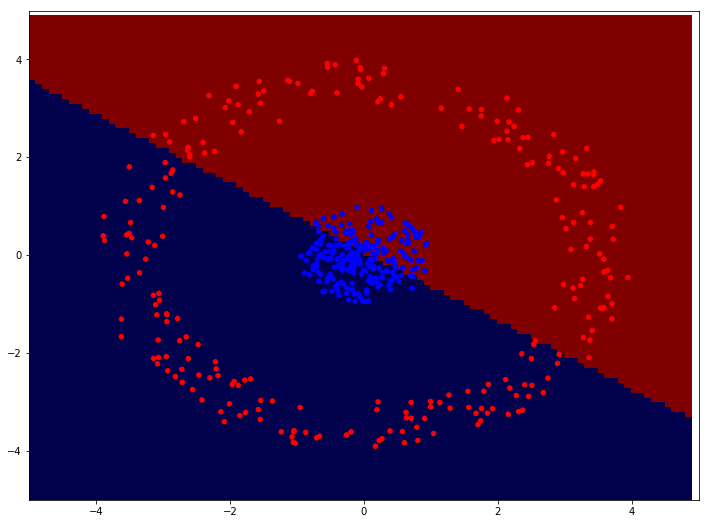

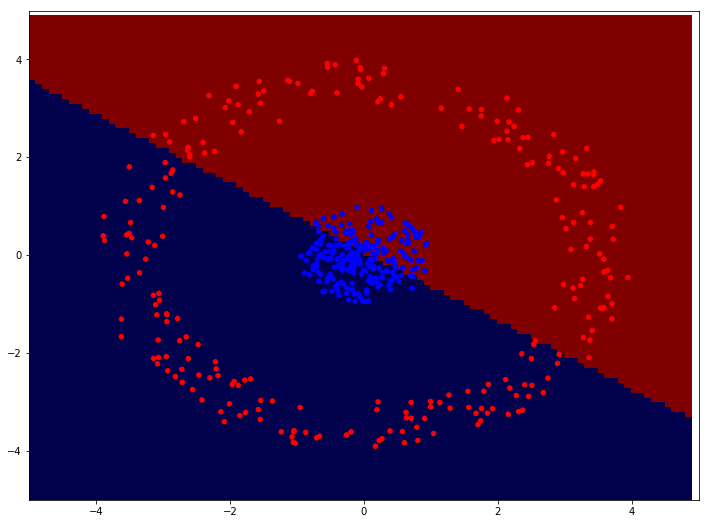

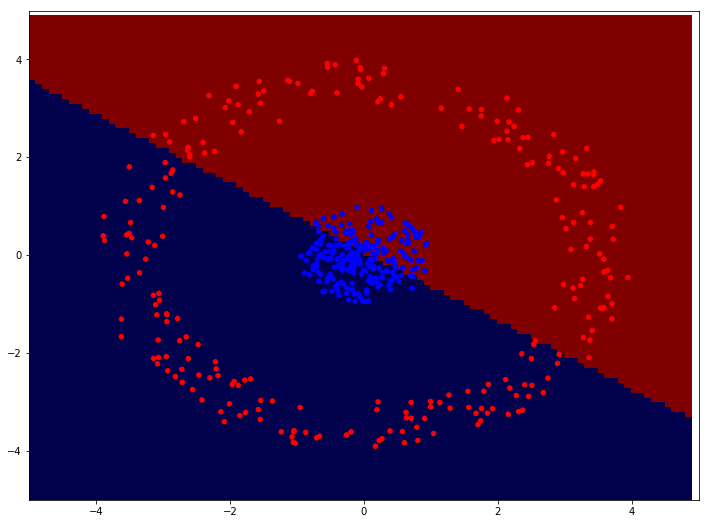

Epoch 4, accuracy=0.54


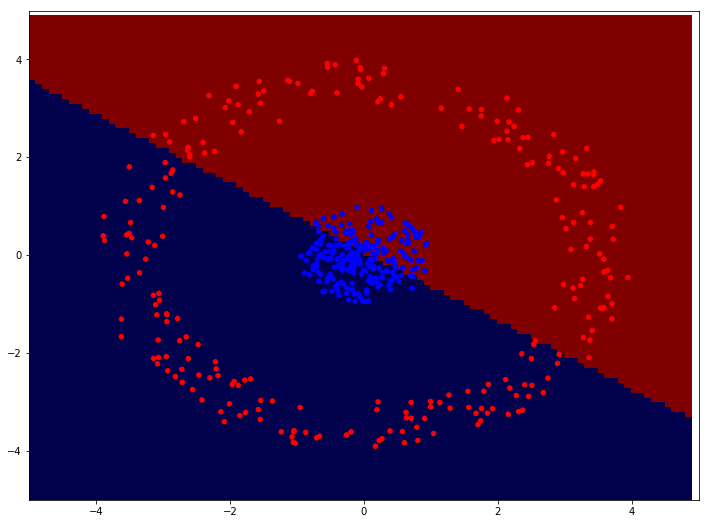

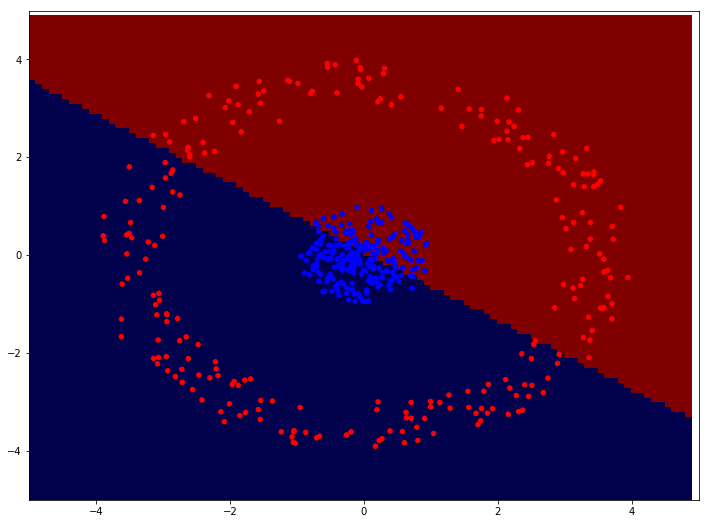

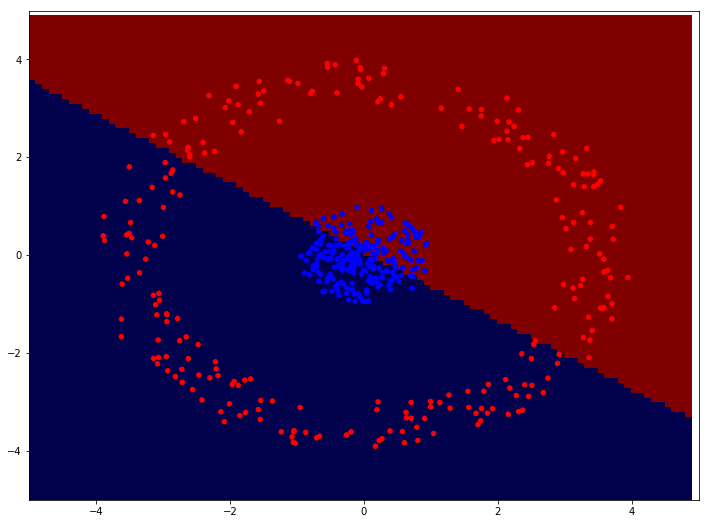

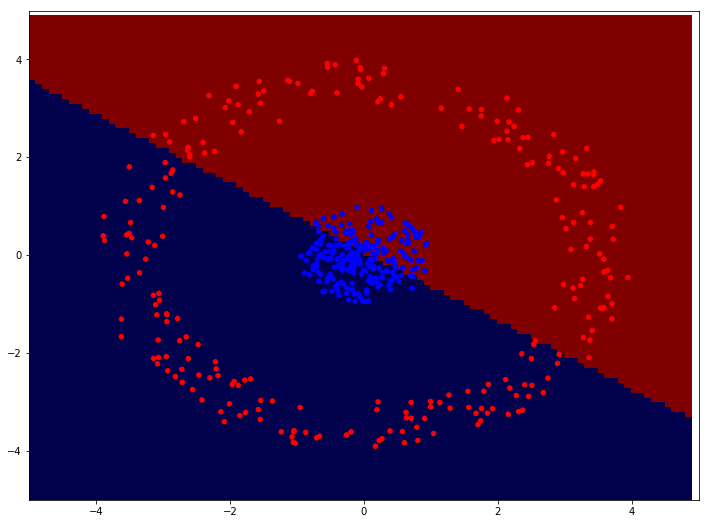

Epoch 5, accuracy=0.54


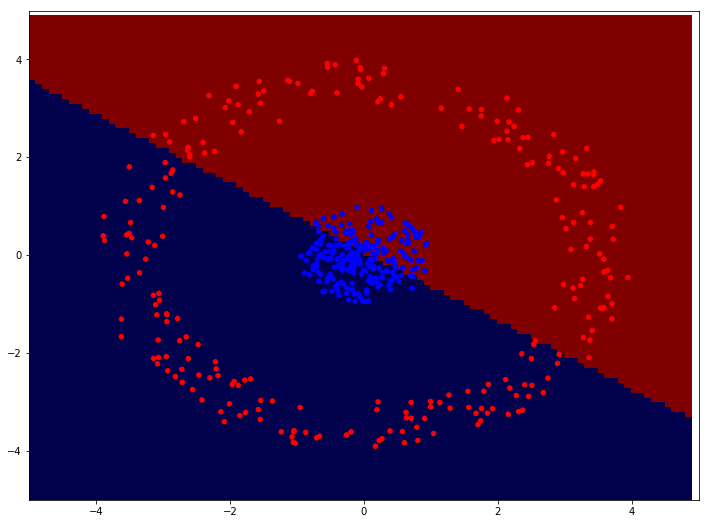

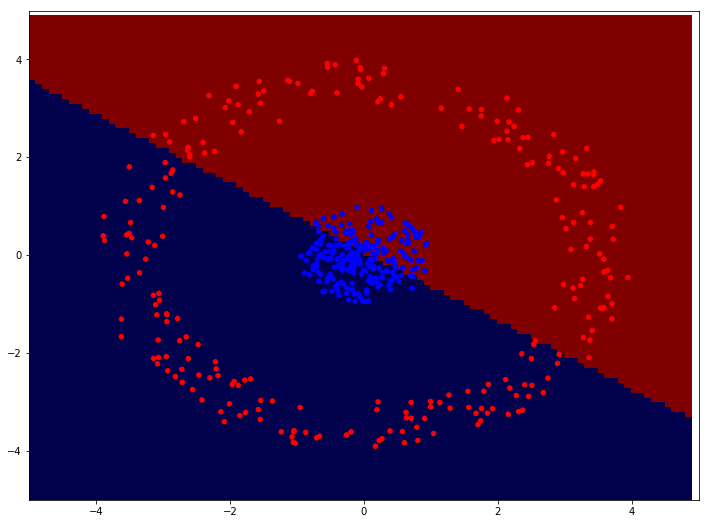

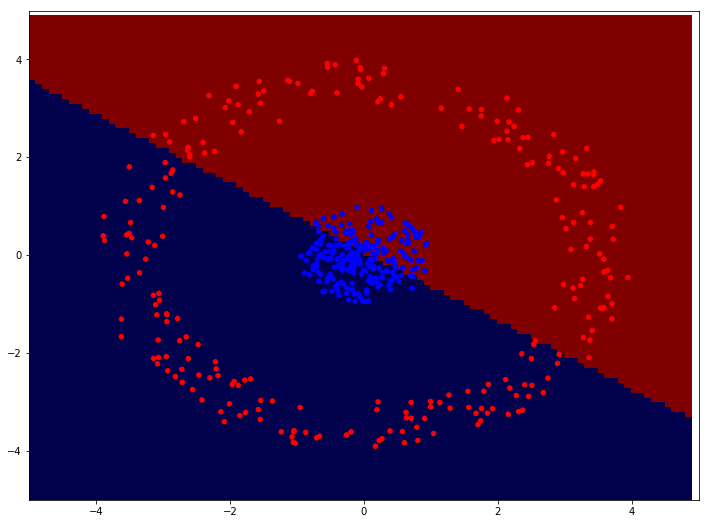

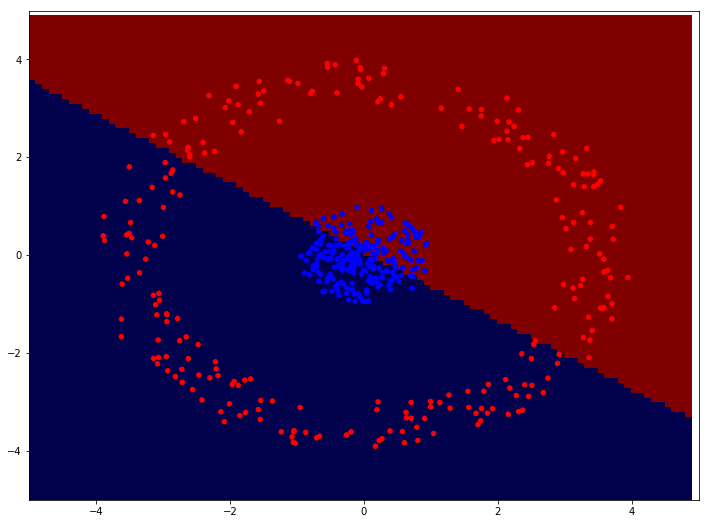

Epoch 6, accuracy=0.54


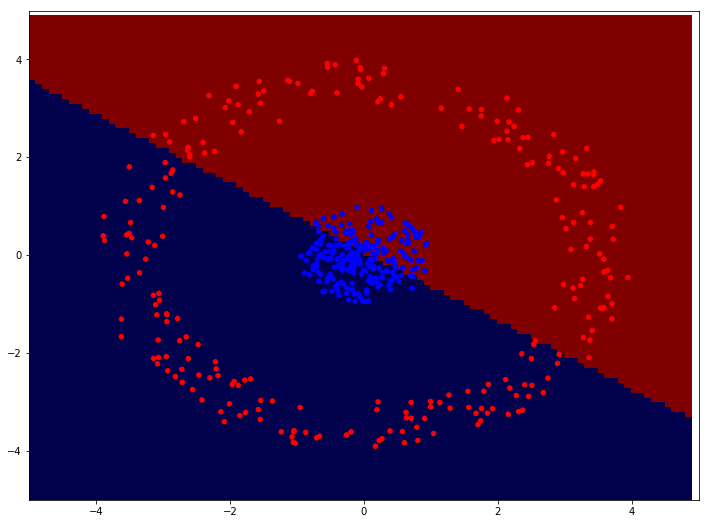

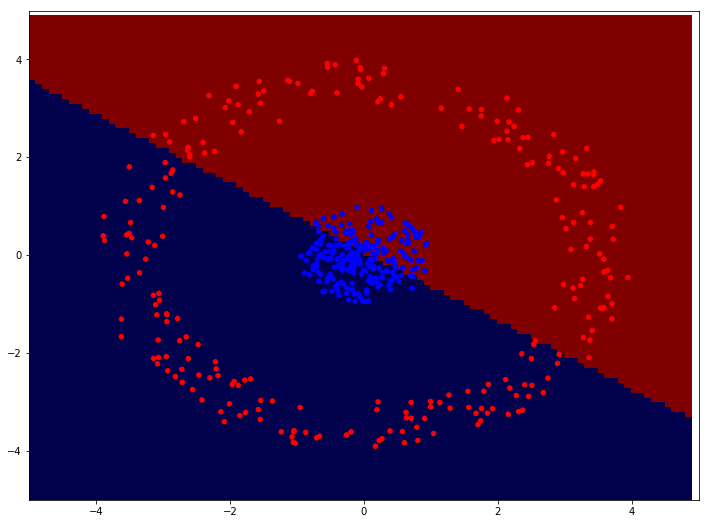

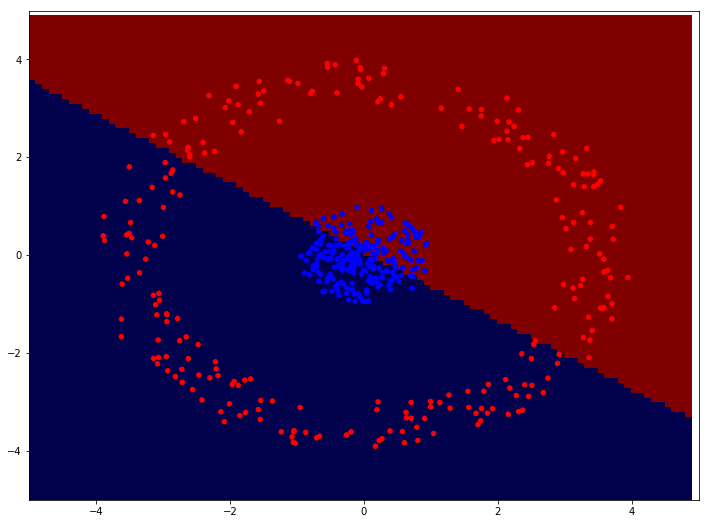

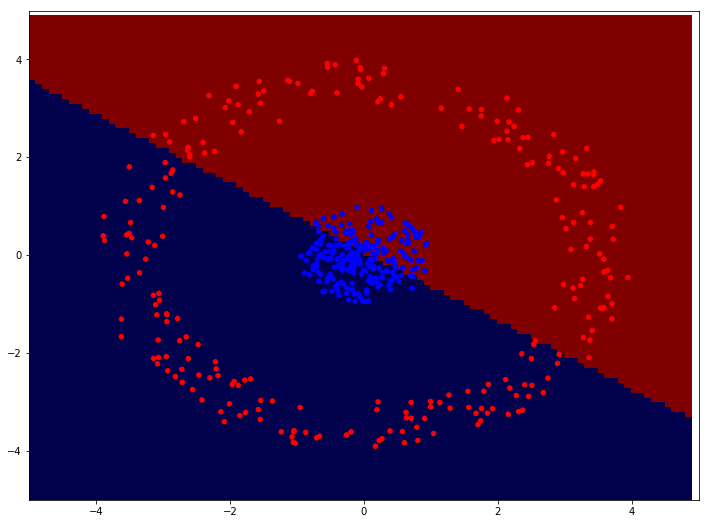

Epoch 7, accuracy=0.54


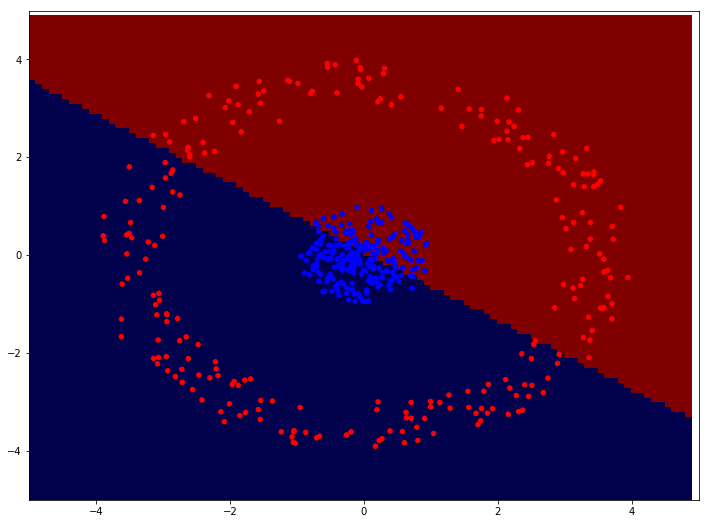

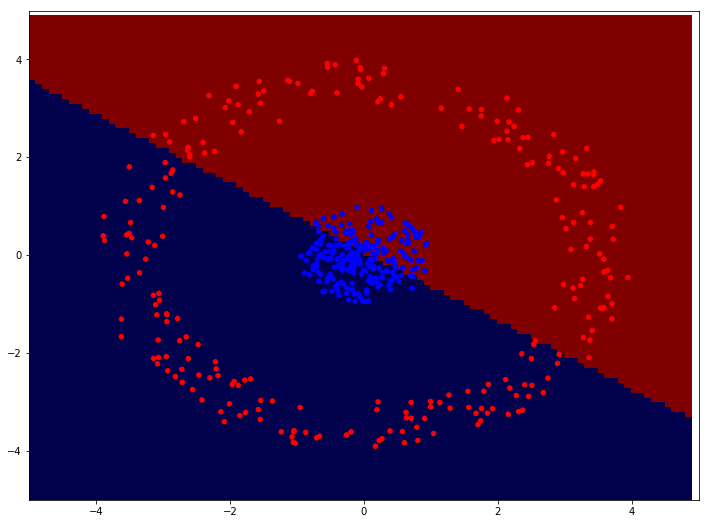

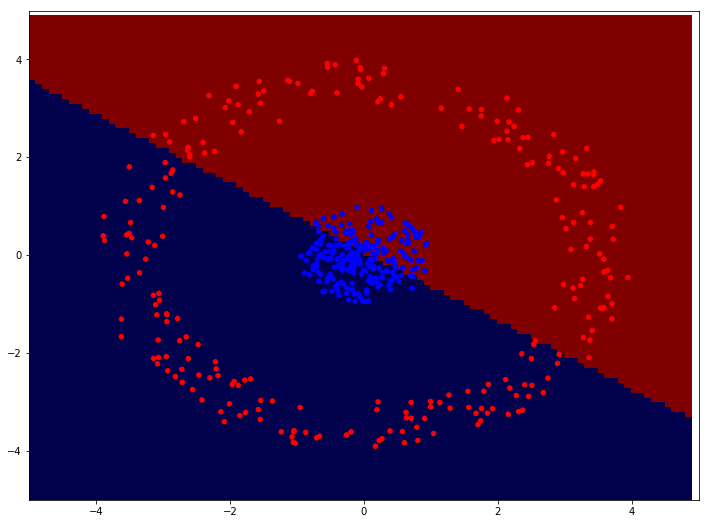

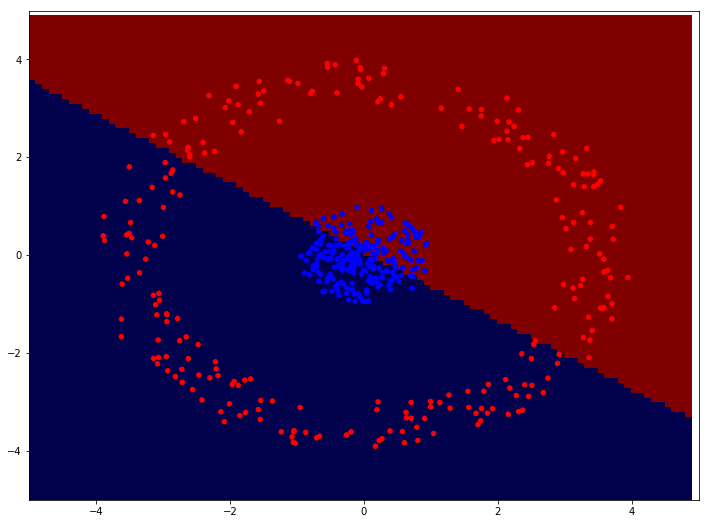

Epoch 8, accuracy=0.54


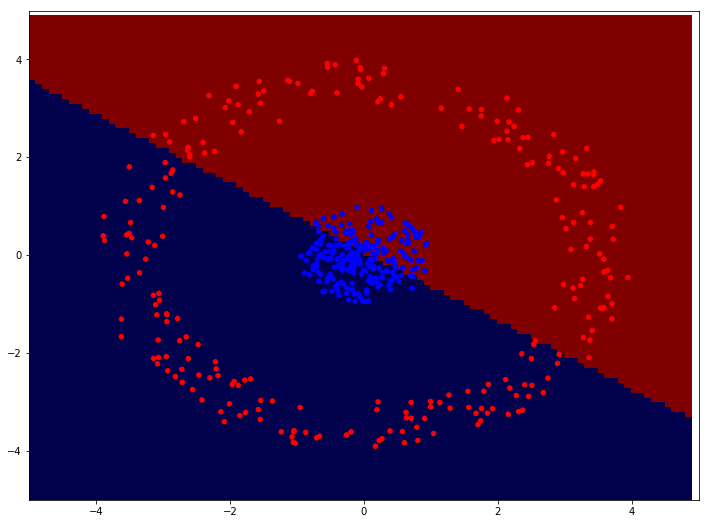

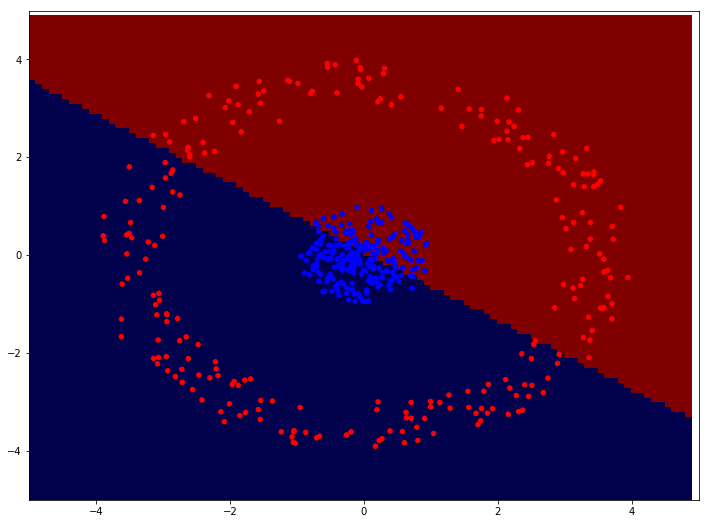

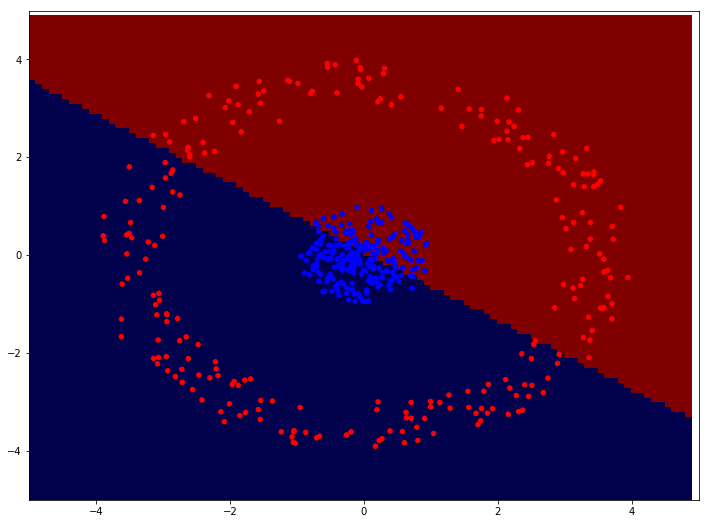

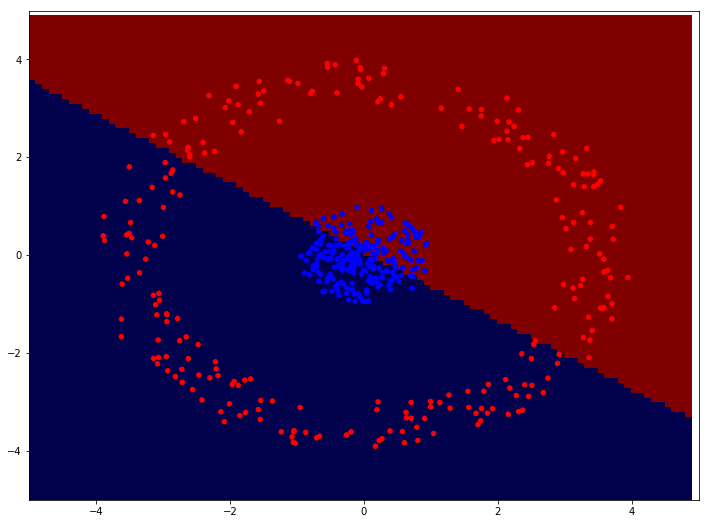

Epoch 9, accuracy=0.54


'\nEvaluez le modèle final sur les données de test\n'

In [11]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x2, y2, test_size=0.2, random_state=42)
learning_rate = 0.01
plotme = True

reset_weights()

for e in range(10):
    count = 0
    correct, tot = 0, 0
    for xt, yt in zip(x_train, y_train):
        
        if predict_class_perceptron(xt) != yt:
            """
            Il faut mettre à jour les paramètres du modèle ici (W et b) !
            """
        else:
            correct += 1
        tot += 1
        
        if plotme and count % 100==0:
            plot_discriminator(predict_class_perceptron, x2, y2)
        count += 1
    print(f"Epoch {e}, accuracy={correct/tot}")
    
"""
Evaluez le modèle final sur les données de test
"""

## Multi Layer Perceptron (MLP) or Neural Network (NN)
![neuralnetwork](img/nn.jpeg)

Accumulation de perceptron dans des «couches», puis accumulation de «couches».

Les équations sont identiques à celles du perceptron. L'algorithme de propagation du gradient dans les couches est la «backpropagation»


In [14]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x2, y2, test_size=0.2, random_state=42)

# Slight modification on labels
def one_hot(x):
    l = len(x)
    xx = np.zeros((l, 2))
    xx[np.arange(l), x] = 1
    return xx

y_train = one_hot(y_train)
y_test = one_hot(y_test)

# print(*((x, y) for x, y in zip(x_train, y_train)), sep='\n')


In [15]:
"""
Liste de fonction d'activation:
* tanh
* sigmoid
* relu
* leaky_relu
...
"""

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation=tf.nn.tanh, input_shape=(2,)),
    # Essayez d'introduire d'autres layers ici !
    tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=200, batch_size=16)

model.evaluate(x_test, y_test)

plot_discriminator(lambda x: np.argmax(model.predict(np.array([x,]))), x2, y2)

NameError: name 'tf' is not defined

## Other algorithms

* KNN

* SVM

* Tree based

La librairie Sklearn contient beaucoup de modèles prêts à être utilisés

1.0


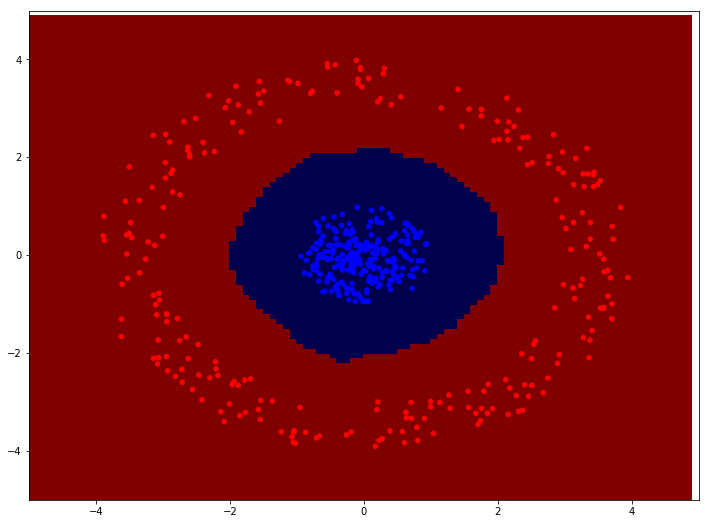

In [16]:
from sklearn.neighbors import KNeighborsClassifier

"""
Doc SKLEARN ici: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
"""

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x2, y2, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

pred = knn.predict(x_test)

print(np.mean(pred==y_test))
plot_discriminator(lambda x: knn.predict([x])[0], x2, y2)

0.63


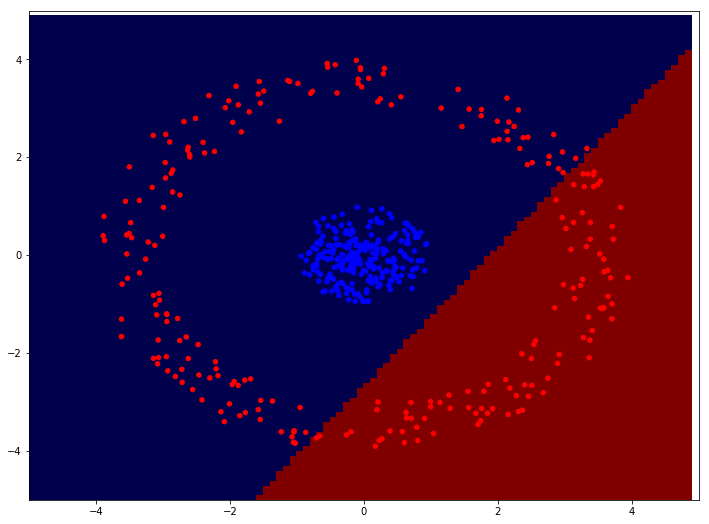

'\nChangez le kernel (famille de fonction) du modèle\n'

In [17]:
from sklearn.svm import SVC

"""
Doc SKLEARN ici: https://scikit-learn.org/stable/modules/svm.html
"""

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x2, y2, test_size=0.2, random_state=42)


# Linear Model
svc = SVC(kernel='linear', )
svc.fit(x_train, y_train)

pred = svc.predict(x_test)

print(np.mean(pred==y_test))
plot_discriminator(lambda x: svc.predict([x])[0], x2, y2)

"""
Changez le kernel (famille de fonction) du modèle
"""

# Polynomial Model


# Exponential model


In [18]:
from sklearn.tree import DecisionTreeClassifier

"""
Doc SKLEARN ici: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
"""

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x2, y2, test_size=0.2, random_state=42)

"""
Implémentez un arbre de décision
Essayez de jouer avec le paramètre `depth` (profondeur de l'arbre)
"""

"\nImplémentez un arbre de décision\nEssayez de jouer avec le paramètre `depth` (profondeur de l'arbre)\n"